# Continuous Assessment
## Module Title: Machine Learning for AI
### Student: Yuri Ribeiro - 2020347
### Github: https://github.com/YWRCCT/YuriRibeiro_ML_CA1

In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix

# Exploratory Data Analysis (EDA)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process. It helps to visualise patterns, characteristics, and relationships between variables through exploration and visualisation of information. (EDA | Exploratory Data Analysis in Python, 2023)

In [40]:
datalog = pd.read_csv("log2.csv")

Let's analyse all variables in the data set by checking the number of rows and columns values in the data, datatypes and missing values.

In [50]:
datalog.describe() # Show mean,std, min, max for the numerical features

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


In [51]:
datalog.shape # There are 65,532 observations and 12 variables

(65532, 12)

In [52]:
datalog.head() # Displays the top 5 observations

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
0,57222,53,54587,53,177,94,83,2,30,1,1,allow
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9,allow
2,6881,50321,43265,50321,238,118,120,2,1199,1,1,allow
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7,allow
4,50002,443,45848,443,25358,6778,18580,31,16,13,18,allow


In [53]:
datalog.tail() # Displays the last 5 observations 

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received,Action
65527,63691,80,13237,80,314,192,122,6,15,4,2,allow
65528,50964,80,13485,80,4680740,67312,4613428,4675,77,985,3690,allow
65529,54871,445,0,0,70,70,0,1,0,1,0,drop
65530,54870,445,0,0,70,70,0,1,0,1,0,drop
65531,54867,445,0,0,70,70,0,1,0,1,0,drop


In [54]:
datalog.info() # Gives us the data type and information about data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Bytes                 65532 non-null  int64 
 5   Bytes Sent            65532 non-null  int64 
 6   Bytes Received        65532 non-null  int64 
 7   Packets               65532 non-null  int64 
 8   Elapsed Time (sec)    65532 non-null  int64 
 9   pkts_sent             65532 non-null  int64 
 10  pkts_received         65532 non-null  int64 
 11  Action                65532 non-null  object
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [55]:
datalog.isnull().sum() # Checking if there is missing records in each column

Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64

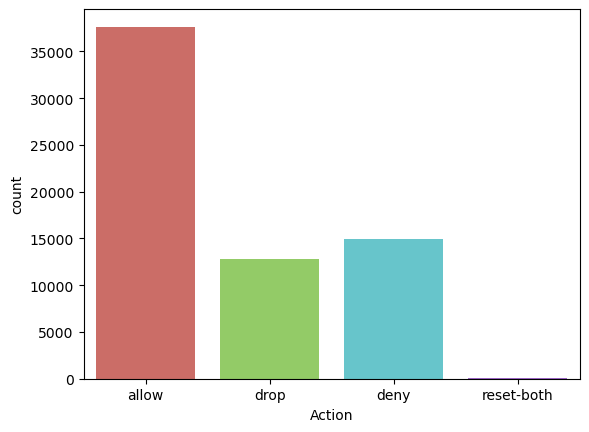

In [29]:
# Check the count of the four categories in Action - allow, drop, deny, reset-both
sns.countplot(x='Action', data= datalog, palette='hls')
plt.show()

C:\Users\Yuri\AppData\Local\Temp\ipykernel_3348\3513176600.py:4: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  datalog.hist(ax=ax)


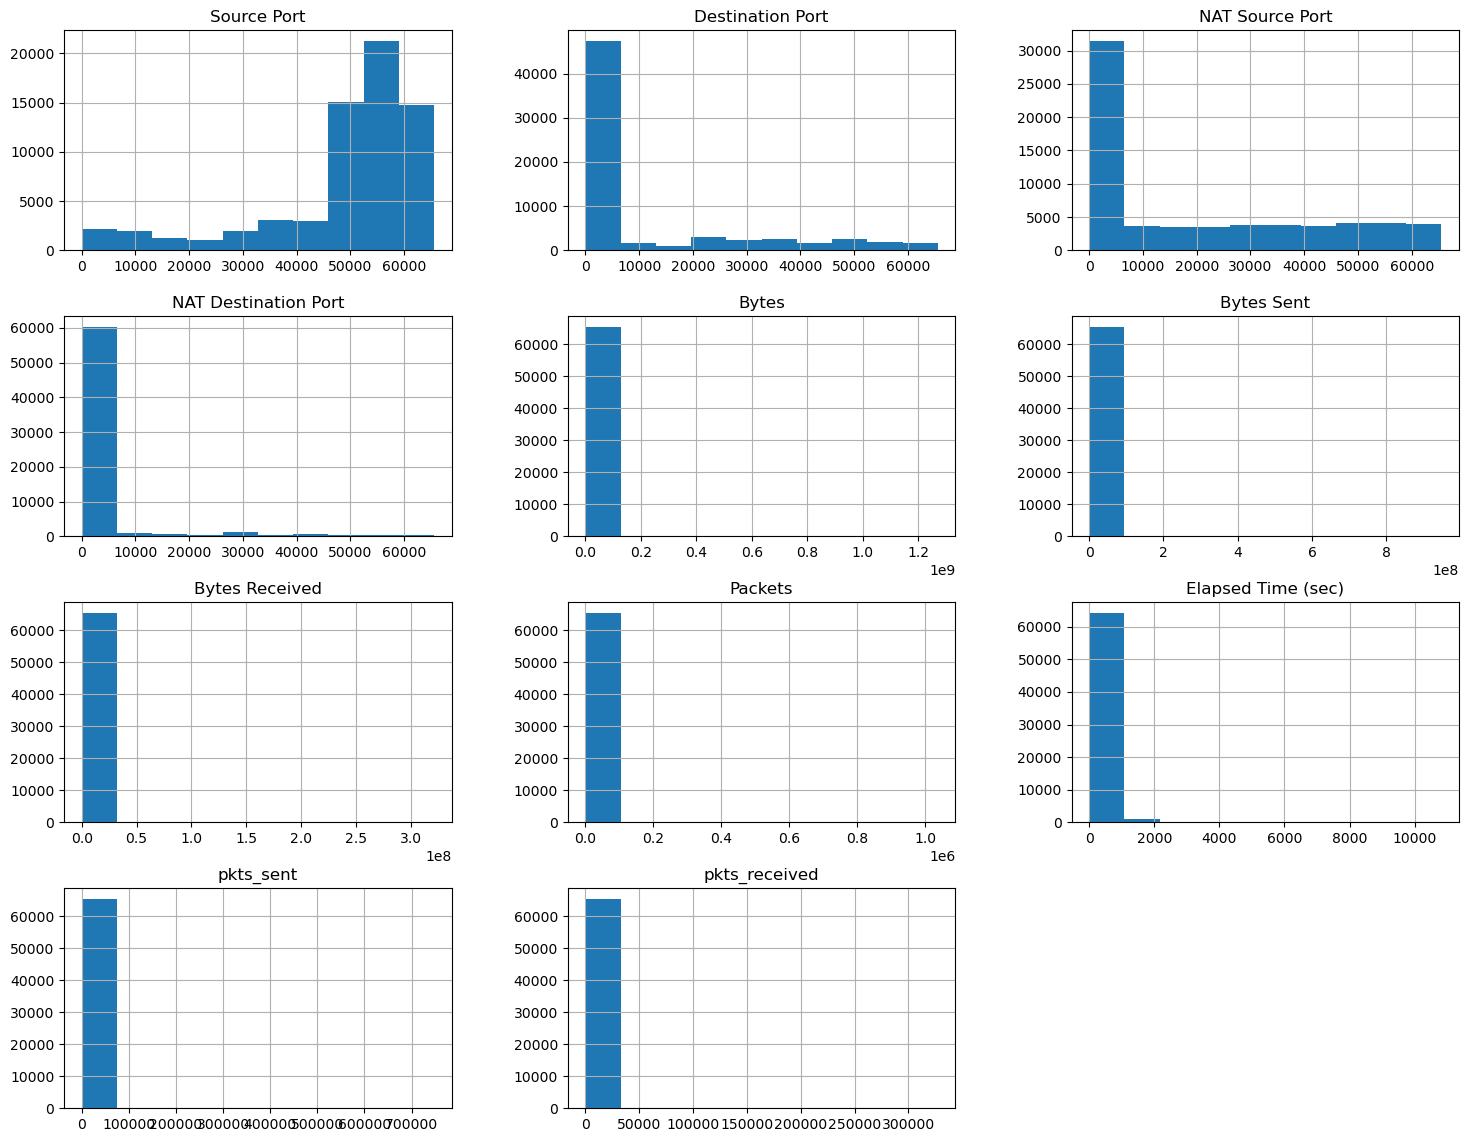

In [48]:
# Check the destribuition using a Histogram 
fig, ax = plt.subplots(figsize=(18, 14))  # Adjust the width and height as needed

# Plot the histogram
datalog.hist(ax=ax)
plt.show()

In [30]:
# Now we drop the categorical feature Action
datalogX = datalog.drop(columns=["Action"])
y = datalog["Action"] # this is my target variable

In [31]:
# Scale numerical features and split the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(datalogX)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

For this CA I've chosen to use 2 machine learning algorithms: Random Forest and K-Nearest Neighbour.

#### Random Forest Classifier
Random forest classifier is a machine learning algorithm that constructs multiple decision trees and combines their predictions. It creates random subsets of the training data and then builds a decision tree for each subset. The final prediction is based on the majority "votes" of all decicion trees.

#### K-Nearest Neighbors Classifier
It calculates the distance between the new data point and all the training data points, selecting the k nearest neighbors. KNN is a simple and effective algorithm for classification tasks.


In [58]:
# Train the model - Random Forest Classifier with 100 trees
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [59]:
# Train the model - k-Nearest Neighbors Classifier
knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [60]:
# result for k-Nearest Neighbors Classifier 

In [61]:
y_pred = knn_model.predict(X_test)

In [62]:
# Evaluating our model computing the confusion matrix
print(confusion_matrix(y_test, y_pred))

[[7530   15    0    0]
 [   6 2979    9    0]
 [   0    0 2562    0]
 [   3    3    0    0]]


Given our confusion matrix our model has an accuracy of 99,72% (13071/13107)

In [63]:
# result for Random Forest Classifier

In [64]:
model = [("Random Forest", rf_model)]
for name, model in model:
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy:", accuracy)
    print(f"{name} Classification Report:")
    print(classification_report(y_test, y_pred))

Random Forest Accuracy: 0.9984740978103304
Random Forest Classification Report:
              precision    recall  f1-score   support

       allow       1.00      1.00      1.00      7545
        deny       1.00      1.00      1.00      2994
        drop       1.00      1.00      1.00      2562
  reset-both       1.00      0.67      0.80         6

    accuracy                           1.00     13107
   macro avg       1.00      0.92      0.95     13107
weighted avg       1.00      1.00      1.00     13107



Random Forest result of accuracy: 99,84%

# Predictions on the test data - Random Forest Classifier

In [66]:
# Predict test data using Random Forest Classifier
y_pred_test = rf_model.predict(X_test)

# Calculate accuracy on the test data
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f"Random Forest Classifier Accuracy - Test Data: {test_accuracy * 100:.2f}%")

# Calculate accuracy on the training data
y_pred_train = rf_model.predict(X_train)
train_accuracy = accuracy_score(y_train, y_pred_train)
print(f"Random Forest Classifier Accuracy - Training Data: {train_accuracy * 100:.2f}%")

Random Forest Classifier Accuracy - Test Data: 99.85%
Random Forest Classifier Accuracy - Training Data: 99.97%


# Conclusion

Usually the accuracy on the training data will be higher than the accuracy on the test data due to the potential for overfitting. In this case we have high accuracy which indicates that the Random Forest model is performing very well . Also, The small difference of 0.12% between the training and test accuracy indicates that the model is not overfitting to the training data